# WEB APP FOR SENTENCE LEVEL EMOTION DETECTION USING DEEP LEARNING ALGORITHM(BiLSTM)

**G_DRIVE**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**NLTK**

In [4]:
import nltk
nltk.download('punkt')      # Required for word_tokenize
nltk.download('stopwords')  # Required for stopwords
nltk.download('wordnet')    # Required for lemmatizer
nltk.download('omw-1.4')    # Lemmatizer language support

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# To import the neccessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# To Save and Load the tokenizer and label encodings 

import joblib

# NLP Preprocessing purpose
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# To split the data into x_train, y_train, tests
from sklearn.model_selection import train_test_split

# Import the labelencoder from the packages "sklearn"
from sklearn.preprocessing import LabelEncoder

# To build a neural network first we have import the libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

# Import the Tokenizer from the packages "tensorflow"
from tensorflow.keras.preprocessing.text import Tokenizer

# Import the pad_sequence from the packages "tensorflow"
from tensorflow.keras.preprocessing.sequence import pad_sequences

# It is used for the purpose of building "BiLSTM MODEL"
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

# To stop the training when the loss starts to increase
from tensorflow.keras.callbacks import EarlyStopping

# You can also use metrics from sklearn to evaluate performance further
from sklearn.metrics import classification_report, confusion_matrix


# Data Loading

In [6]:
train_data = pd.read_csv('/content/drive/MyDrive/SEP/Dataset/train.txt', sep=';', names=['text', 'emotion'])
val_data = pd.read_csv('/content/drive/MyDrive/SEP/Dataset/val.txt', sep=';', names=['text', 'emotion'])
test_data = pd.read_csv('/content/drive/MyDrive/SEP/Dataset/test.txt', sep=';', names=['text', 'emotion'])

In [7]:
# To print the 5 rows of "train_data"

train_data.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [8]:
# To print the shape of the "train_data"

train_data.shape

(16000, 2)

In [9]:
# To print the first 5 rows of "test_data"

test_data.head()

,text,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [10]:
# to print the shape of "test_data"

test_data.shape

(2000, 2)

In [11]:
# To print the first 5 rows of "val_data"

val_data.head()

,text,emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


## **To check the data for preprocessing **
*Training data*

In [12]:
# To print the shape of "val_data"

val_data.shape

(2000, 2)

In [13]:
# Ti check if the data is balanced or not

train_data.emotion.value_counts()

,count
emotion,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


In [14]:
train_data.emotion.value_counts() / train_data.shape[0] *100

,count
emotion,
joy,33.51250
sadness,29.16250
anger,13.49375
fear,12.10625
love,8.15000
surprise,3.57500


<Axes: xlabel='emotion', ylabel='count'>

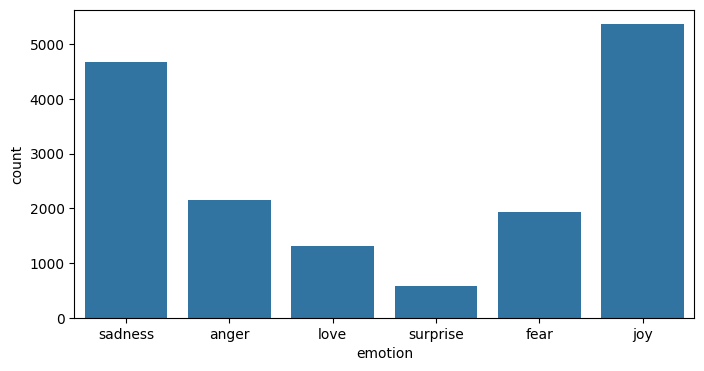

In [15]:
# To plot the data based on the above

plt.figure(figsize = (8, 4))
sns.countplot(x = 'emotion', data = train_data)

# Here data is imbalanced so we try to balanced it

In [16]:
# To check the null values in dataset

train_data.isnull()

,text,emotion
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
15995,False,False
15996,False,False
15997,False,False
15998,False,False


In [17]:
train_data.isnull().sum()

,0
text,0
emotion,0


In [18]:
# To print the number of duplicated values

train_data.duplicated().sum()

# one row which is duplicated

np.int64(1)

In [19]:
# To remove that duplicate values

# To store the duplicate values rows index in "index"

index = train_data[train_data.duplicated() == True].index

# To drop that rows here

train_data.drop(index, axis = 0, inplace = True) # axis = 0 means row

# Then we have to reset the index position because one row droped

train_data.reset_index(inplace = True, drop = True)

In [20]:
# To print the rows which are duplicated (duplicated in the text but with different emotions)
train_data[train_data['text'].duplicated() == True]

,text,emotion
5067,i feel on the verge of tears from weariness i ...,joy
6133,i still feel a craving for sweet food,love
6563,i tend to stop breathing when i m feeling stre...,anger
7623,i was intensely conscious of how much cash i h...,sadness
7685,im still not sure why reilly feels the need to...,surprise
8246,i am not amazing or great at photography but i...,love
9596,ive also made it with both sugar measurements ...,joy
9687,i had to choose the sleek and smoother feel of...,joy
9769,i often find myself feeling assaulted by a mul...,sadness
9786,i feel im being generous with that statement,joy


In [21]:
# To print some of those rows to check
train_data[train_data['text'] == train_data.iloc[7623]['text']]

,text,emotion
1625,i was intensely conscious of how much cash i h...,anger
7623,i was intensely conscious of how much cash i h...,sadness


In [22]:
train_data[train_data['text'] == train_data.iloc[14313]['text']]

,text,emotion
13653,i could feel myself hit this strange foggy wall,fear
14313,i could feel myself hit this strange foggy wall,surprise


# To remove duplicates

In [23]:
# To store the duplicate values rows index in "index"

index = train_data[train_data['text'].duplicated() == True].index

# To drop that rows here

train_data.drop(index, axis = 0, inplace = True)

# Then we have to reset the index position because one row droped

train_data.reset_index(inplace=True, drop = True)

# To remove stopwords

In [25]:
# To count the number of stopwords in the data and stored it as in "temp"

temp = train_data.copy()
stop_words = set(stopwords.words("english"))

# Using lambda function to remove stop words

temp['stop_words'] = temp['text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

,count
stop_words,
5,1416
7,1405
6,1392
4,1341
8,1319
3,1263
9,1177
10,1048
2,922


<Axes: ylabel='Frequency'>

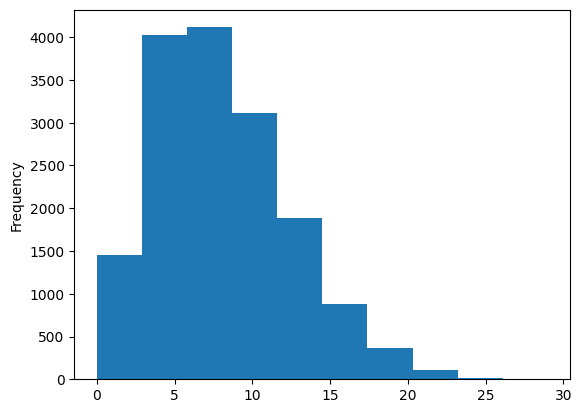

In [26]:
# To print the plot for the distribution of stopwords visually

temp['stop_words'].plot(kind = 'hist')

# Testing data

In [27]:
# To check if the data is balanced or not

test_data.emotion.value_counts()

,count
emotion,
joy,695
sadness,581
anger,275
fear,224
love,159
surprise,66


<Axes: xlabel='emotion', ylabel='count'>

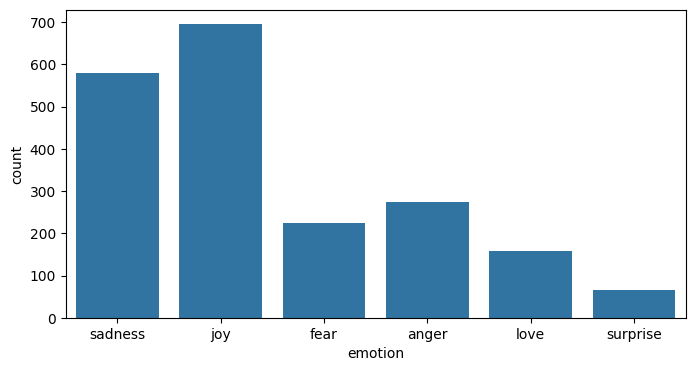

In [28]:
# To plot the data based on the above

plt.figure(figsize = (8, 4))
sns.countplot(x = 'emotion', data = test_data)

In [29]:
# To check the null values

test_data.isnull()

,text,emotion
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1995,False,False
1996,False,False
1997,False,False
1998,False,False


In [30]:
test_data.isnull().sum()

,0
text,0
emotion,0


In [31]:
# To print the number of duplicated values

test_data.duplicated().sum()

# 0 row which is duplicated

np.int64(0)

In [32]:
#print the rows which are duplicated
test_data[test_data['text'].duplicated() == True]

,text,emotion


In [33]:
# To count the number of stopwords in the data and stored it as in "temp"

temp = test_data.copy()
stop_words = set(stopwords.words("english"))

# Using lambda function to remove stop words

temp['stop_words'] = temp['text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

,count
stop_words,
7,184
6,179
3,175
5,175
4,163
9,163
8,139
10,123
2,118


<Axes: ylabel='Frequency'>

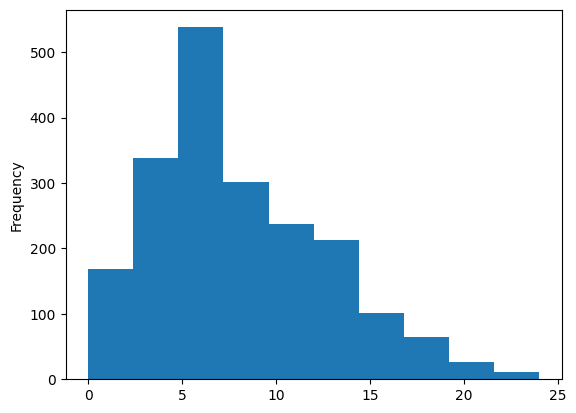

In [34]:
# To print the plot for the distribution of stopwords visually

temp['stop_words'].plot(kind = 'hist')

# Validation data

In [35]:
# To check if the data is balanced or not

val_data.emotion.value_counts()

,count
emotion,
joy,704
sadness,550
anger,275
fear,212
love,178
surprise,81


<Axes: xlabel='emotion', ylabel='count'>

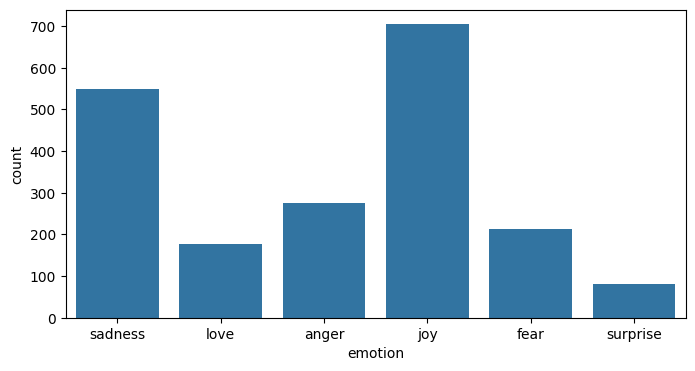

In [36]:
# To plot the data based on the above

plt.figure(figsize = (8, 4))
sns.countplot(x = 'emotion', data = val_data)

In [37]:
# To check null values

val_data.isnull()

,text,emotion
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1995,False,False
1996,False,False
1997,False,False
1998,False,False


In [38]:
val_data.isnull().sum()

,0
text,0
emotion,0


In [39]:
# To print the number of duplicated values

val_data.duplicated().sum()

# 0 row which is duplicated

np.int64(0)

In [40]:
# To print the rows which are duplicted

val_data[val_data['text'].duplicated() == True]

,text,emotion
603,i have had several new members tell me how com...,joy
1993,i feel so tortured by it,anger


In [41]:
# To view the duplicate values for the particular data

val_data[val_data['text'] == val_data.iloc[603]['text']]

,text,emotion
300,i have had several new members tell me how com...,love
603,i have had several new members tell me how com...,joy


In [42]:
val_data[val_data['text'] == val_data.iloc[1993]['text']]

,text,emotion
774,i feel so tortured by it,fear
1993,i feel so tortured by it,anger


In [43]:
# To store the duplicate values rows index in "index"

index = val_data[val_data['text'].duplicated() == True].index

# To drop that rows here

val_data.drop(index, axis = 0, inplace = True)

# Then we have to reset the index position because one row droped

val_data.reset_index(inplace = True, drop = True)

In [44]:
# To count the number of stopwords in the data and stored it as in "temp"

temp = val_data.copy()
stop_words = set(stopwords.words("english"))

# Using lambda function to remove stop words

temp['stop_words'] = temp['text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

,count
stop_words,
7,190
5,175
8,173
3,160
6,160
10,150
9,146
4,145
2,133


<Axes: ylabel='Frequency'>

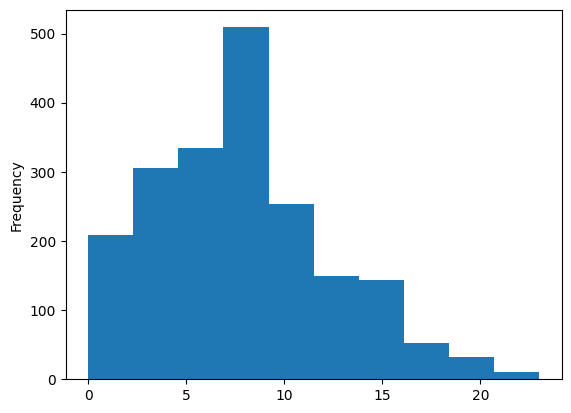

In [45]:
# To print the plot for the distribution of stopwords visually

temp['stop_words'].plot(kind = 'hist')

# Compare the rows of two datasets

In [46]:
def dataframe_difference(df1, df2, which=None):
    """Find rows which are different between two DataFrames."""

    # Combine the two DataFrames using a merge operation, with the
    # indicator parameter set to True. This adds a column called _merge
    # to the resulting DataFrame, which indicates the source of each row.
    comparison_df = df1.merge(
        df2,
        indicator=True,
        how='outer'
    )

    # Filter the merged DataFrame based on the value of _merge. If which
    # is not specified, return all rows where _merge is not 'both'.
    # Otherwise, return all rows where _merge has the specified value

    if which is None:
        diff_df = comparison_df[comparison_df['_merge'] != 'both']
    else:
        diff_df = comparison_df[comparison_df['_merge'] == which]

    # Return the filtered DataFrame
    return diff_df


In [47]:
# Here we merges training data and test_data

dataframe_difference(train_data, test_data, which='both')

,text,emotion,_merge


In [48]:
# Here we merges training data and validation data

dataframe_difference(train_data, val_data, which='both')

,text,emotion,_merge


In [49]:
# Here we merges training data and validation data

dataframe_difference(val_data, test_data, which='both')

,text,emotion,_merge


# NLP Preprocessing

In [ ]:

# Ensure you've downloaded stopwords and wordnet if not already
# nltk.download('stopwords')
# nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lower_case(text):
    return " ".join([word.lower() for word in text.split()])

def remove_stop_words(text):
    return " ".join([word for word in text.split() if word not in stop_words])

def Removing_numbers(text):
    return ''.join([char for char in text if not char.isdigit()])

def Removing_punctuations(text):
    text = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@^_{|}~"""), ' ', text)
    text = text.replace('؛', "")
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def lemmatization(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_small_sentences(df, column='Text'):
    df.loc[df[column].str.split().apply(len) < 3, column] = np.nan
    return df

# def normalize_text(df, column='Text'):
#     df[column] = df[column].apply(lower_case)
#     df[column] = df[column].apply(remove_stop_words)
#     df[column] = df[column].apply(Removing_numbers)
#     df[column] = df[column].apply(Removing_punctuations)
#     df[column] = df[column].apply(Removing_urls)
#     df[column] = df[column].apply(lemmatization)
#     return df

def normalize_text(df, column='text'):  # change default to 'text'
    df[column] = df[column].apply(lower_case)
    df[column] = df[column].apply(remove_stop_words)
    df[column] = df[column].apply(Removing_numbers)
    df[column] = df[column].apply(Removing_punctuations)
    df[column] = df[column].apply(Removing_urls)
    df[column] = df[column].apply(lemmatization)
    return df


def normalized_sentence(sentence):
    sentence = lower_case(sentence)
    sentence = remove_stop_words(sentence)
    sentence = Removing_numbers(sentence)
    sentence = Removing_punctuations(sentence)
    sentence = Removing_urls(sentence)
    sentence = lemmatization(sentence)
    return sentence


In [51]:
# To check whether its a correctly normalized or not

normalized_sentence("My Name is Mohamed. @Tweets,  plays 2022  Egypt_")

'name mohamed tweet play egypt'

In [52]:
# To normalize all the dataset

train_data = normalize_text(train_data, column='text')
test_data = normalize_text(test_data, column='text')
val_data = normalize_text(val_data, column='text')

In [53]:
# To check column name

print(train_data.columns)

Index(['text', 'emotion'], dtype='object')


# Text Preprocessing

# Splitting of the data into x and y train, test

In [55]:
#Preprocess text

X_train = train_data['text'].values
y_train = train_data['emotion'].values

X_test = test_data['text'].values
y_test = test_data['emotion'].values

X_val = val_data['text'].values
y_val = val_data['emotion'].values

In [56]:
# To view the shape of the data

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(15969,)
(15969,)
(2000,)
(2000,)
(1998,)
(1998,)


In [57]:
print(X_train.ndim)
print(y_train.ndim)
print(X_test.ndim)
print(y_test.ndim)
print(X_val.ndim)
print(y_val.ndim)

1
1
1
1
1
1


# Perform Label Encoding

In [58]:
# Before Label Encoding
# To print the labels after encoding
print(set(y_train))

{'love', 'sadness', 'anger', 'surprise', 'fear', 'joy'}


In [60]:
# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [61]:
# After label encoding
# To print the labels after encoding

print(set(y_train))

{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)}


# To change the y_train, test, val into categorical values

In [64]:
# To Convert the class vector (integers) to binary class matrix
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [65]:
print(y_train)
print(y_test)
print(y_val)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


# Tokenization

In [67]:
# Tokenize words
# If X_train and X_test are NumPy arrays

tokenizer = Tokenizer(oov_token='UNK')
texts = np.concatenate([X_train, X_test], axis=0).tolist()
tokenizer.fit_on_texts(texts)

In [68]:
print(type(X_train), type(X_test))


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [69]:
#document count: A dictionary of words and how many documents each appeared in.
#in this dataset the output will be the number of rows

tokenizer.document_count

17969

In [70]:
# word counts: A dictionary of words and their counts.

tokenizer.word_counts

OrderedDict([('didnt', 304),
             ('feel', 12920),
             ('humiliated', 59),
             ('go', 492),
             ('feeling', 6139),
             ('hopeless', 68),
             ('damned', 4),
             ('hopeful', 67),
             ('around', 347),
             ('someone', 295),
             ('care', 132),
             ('awake', 21),
             ('im', 2736),
             ('grabbing', 6),
             ('minute', 71),
             ('post', 146),
             ('greedy', 75),
             ('wrong', 85),
             ('ever', 247),
             ('nostalgic', 55),
             ('fireplace', 3),
             ('know', 977),
             ('still', 660),
             ('property', 4),
             ('grouchy', 29),
             ('ive', 659),
             ('little', 831),
             ('burdened', 67),
             ('lately', 107),
             ('wasnt', 107),
             ('sure', 270),
             ('taking', 102),
             ('milligram', 1),
             ('time', 1090),


In [71]:
# word index: A dictionary of words and their uniquely assigned integers.

tokenizer.word_index

{'UNK': 1,
 'feel': 2,
 'feeling': 3,
 'like': 4,
 'im': 5,
 'time': 6,
 'really': 7,
 'know': 8,
 'get': 9,
 'make': 10,
 'little': 11,
 'people': 12,
 'day': 13,
 'want': 14,
 'thing': 15,
 'one': 16,
 'would': 17,
 'life': 18,
 'think': 19,
 'still': 20,
 'ive': 21,
 'even': 22,
 'way': 23,
 'bit': 24,
 'something': 25,
 'love': 26,
 'going': 27,
 'much': 28,
 'dont': 29,
 'could': 30,
 'go': 31,
 'need': 32,
 'back': 33,
 'good': 34,
 'pretty': 35,
 'always': 36,
 'say': 37,
 'see': 38,
 'right': 39,
 'work': 40,
 'also': 41,
 'today': 42,
 'friend': 43,
 'year': 44,
 'around': 45,
 'made': 46,
 'cant': 47,
 'though': 48,
 'help': 49,
 'got': 50,
 'well': 51,
 'come': 52,
 'didnt': 53,
 'lot': 54,
 'felt': 55,
 'someone': 56,
 'never': 57,
 'thought': 58,
 'look': 59,
 'every': 60,
 'week': 61,
 'happy': 62,
 'less': 63,
 'many': 64,
 'sure': 65,
 'enough': 66,
 'quite': 67,
 'find': 68,
 'away': 69,
 'take': 70,
 'anything': 71,
 'home': 72,
 'kind': 73,
 'ever': 74,
 'person': 75

In [72]:
# To print the index of a single word

tokenizer.word_index['towards']

220

In [73]:
#converting a single sentence to list of indexes

tokenizer.texts_to_sequences(X_train[0].split())

[[53], [2], [531]]

In [74]:
#convert the list of indexes into a matrix of ones and zeros (BOW)

tokenizer.texts_to_matrix(X_train[0].split())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
#the sentence contains three words and the size of the vocabulary is 14325

tokenizer.texts_to_matrix(X_train[0].split()).shape

(3, 14332)

In [76]:
# To store the tokenized data in "sentences_train, test, val"

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

In [77]:
print(sequences_train)

[[53, 2, 531], [31, 3, 421, 3445, 435, 45, 56, 176, 1223], [5, 2719, 393, 147, 2, 355, 302], [74, 3, 586, 4092, 8, 20, 3446], [3, 994], [21, 3, 11, 436, 226, 227, 65], [21, 247, 7094, 6, 7095, 755, 21, 2450, 1312, 54, 1669, 41, 2, 4, 352], [2, 338, 18, 1313, 693, 44, 170, 277], [5083, 44, 2, 5083, 5084, 51, 46, 914, 3015], [2, 568], [2, 4, 10, 628, 452, 138, 25], [2, 356, 422, 252, 891, 647, 1765, 2451], [19, 5085, 6, 44, 2, 508], [2, 258, 347, 4093], [4094, 1460, 892, 130, 694, 7096, 937, 87, 68, 6, 127, 1461, 18, 1462, 3447, 90, 108, 2452, 3016, 2, 11, 423], [2, 695, 915, 322], [53, 7, 2, 323], [2, 35, 495, 6], [92, 3, 827, 2453, 103, 475, 1870, 2101, 5086, 2453, 5087], [2, 3448, 796, 1123, 60, 3017, 40, 137], [2, 378, 437, 79, 149, 71, 278, 71], [3, 174, 134, 124, 2263, 49, 2, 1871, 2454, 105, 1596, 1314, 1034, 119, 115, 557, 965, 15, 637], [3, 828, 829], [97, 49, 5088, 5089, 453, 3018, 200, 3, 232, 97, 49], [111, 2, 4, 424, 48, 29, 324, 379, 125], [20, 26, 228, 209, 357, 3019, 853,

In [78]:
print(sequences_test)

[[5, 3, 107, 577, 5, 4274, 39], [5, 5013, 118, 2, 353], [57, 10, 2406, 74, 14, 2, 4, 299], [76, 13533, 780, 3489, 6659, 560, 3, 238, 485, 1745], [3, 11, 477, 16], [47, 288, 1208, 1361, 2, 340], [55, 821, 115, 4311, 239], [842, 6015, 296, 391, 64, 23, 2487, 13534, 783, 1342, 3, 81, 178, 1367, 1254, 1748, 3066], [4, 13535, 3, 668, 590, 38, 399, 180], [13536, 2, 678, 194, 2174, 13537, 257, 61, 5, 801, 13538, 1416, 596], [2, 264, 208], [2, 5154, 261, 328, 145, 354, 2764, 1400, 6146, 1183], [872, 735, 13539, 3, 3882, 203], [2, 275, 266, 617, 12, 29, 22, 32, 1182], [68, 1362, 1146, 3, 587], [3, 530, 5, 65, 6084], [2, 11, 547, 42], [2, 4, 1522, 17, 714, 13540, 13541, 651], [2, 13542, 1046, 9, 315, 1570, 91, 890, 10, 4879, 1570, 90, 83, 8, 1046], [2, 4, 780, 4059, 385, 73, 251], [5, 65, 3, 752, 74, 31, 69, 131, 363, 144, 3, 2387, 1355, 18, 770, 1844, 770, 44], [2, 4, 21, 882, 8, 64, 461, 1207, 5, 768, 232, 112, 11, 700], [3948, 147, 77, 44, 2, 515, 6950, 5436, 2, 11, 24, 2128, 4, 56, 4, 4438, 

In [79]:
print(sequences_val)

[[5, 3, 67, 152, 256, 120, 3332, 402], [2, 4, 20, 146, 500, 2107, 500, 542, 874], [2, 4, 497, 1], [3, 459, 1058], [956, 3, 558], [101, 2, 768, 119, 165], [3, 279, 97, 70, 176, 267], [2, 528, 333, 97, 153], [2, 63, 847, 2339, 60, 13], [2, 507, 299, 278], [2, 549, 532, 128], [13085, 1356, 1272, 1286, 146, 1075, 3, 62], [304, 136, 50, 45, 3, 1, 4025, 469], [3, 827], [740, 167, 4319, 393, 670, 3, 4, 502, 1358, 6306, 8763, 13083], [57, 148, 3, 230, 1691, 113, 1982, 333, 2451, 12358, 8253, 2759, 1, 113], [2, 733, 67, 514, 46, 13, 11, 78], [8, 2, 4, 133, 4971, 1, 4653, 951, 1], [41, 168, 30, 7, 2, 4956, 1, 186, 305, 388, 5608, 1, 2970, 300, 1262, 1661, 9141, 3214, 104, 6], [1681, 170, 43, 414, 892, 5, 3, 533], [8, 648, 27, 2, 417], [2, 98, 99, 5, 652, 99, 5, 1266, 1567, 935, 799, 83], [2, 25, 57, 7, 572], [2, 4, 656, 477, 2288, 6], [2, 376, 692, 1422, 85, 218, 135, 91, 166, 1325, 3123, 161], [2395, 8786, 6278, 5, 2259, 13, 762, 31, 10717, 588, 150, 3250, 293, 16, 289, 3, 438, 492, 4534], [8, 

# Padding the data

In [81]:
# The vectors we obtain are generally not of equal lengths
# For that, we might need to pad the sequences to max len.

test_data.shape

(2000, 2)

In [82]:
# To create a vaariable and to find the max(), then stored it in a "maxlen"

maxlen = max([len(t) for t in train_data['text']])
maxlen

229

In [83]:
X_train = pad_sequences(sequences_train, maxlen=229, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=229, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=229, truncating='pre')

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 14332


In [84]:
# before padding

sequences_train[0]

[53, 2, 531]

In [85]:
#after padding

X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

# Word Embedding

In [86]:
# import os
# print(os.getcwd())

In [87]:
# # Read GloVE embeddings
# # path to glove file directly from the browser

# path_to_glove_file = "C:/Users/HP/OneDrive/Desktop/NLP Project/glove.6B.200d.txt"
# #path_to_glove_file = 'glove.6B.200d.txt'
# num_tokens = vocabSize
# embedding_dim = 200 #latent factors or features
# hits = 0
# misses = 0
# embeddings_index = {}


In [88]:
# # Read word vectors
# with open(path_to_glove_file) as f:
#     for line in f:
#         word, coefs = line.split(maxsplit=1)
#         coefs = np.fromstring(coefs, "f", sep=" ")
#         embeddings_index[word] = coefs
# print("Found %s word vectors." % len(embeddings_index))

# # Assign word vectors to our dictionary/vocabulary
# embedding_matrix = np.zeros((num_tokens, embedding_dim))
# for word, i in tokenizer.word_index.items():
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         # Words not found in embedding index will be all-zeros.
#         # This includes the representation for "padding" and "OOV"
#         embedding_matrix[i] = embedding_vector
#         hits += 1
#     else:
#         misses += 1
# print("Converted %d words (%d misses)" % (hits, misses))

# Bidirectional LSTM MODEL BUILDING

In [90]:
# Key parameters
embedding_dim = 200
vocabSize = len(tokenizer.word_index) + 1  # Make sure tokenizer is already fitted
maxlen = X_train.shape[1]  # Length of padded input
num_classes = y_train.shape[1]  # One-hot encoded output classes

# Build BiLSTM model (no GloVe, learning embeddings from scratch)
adam = Adam(learning_rate=0.005)

model = Sequential()
model.add(Embedding(input_dim=vocabSize, output_dim=embedding_dim, input_shape=(maxlen,)))
# model.add(Embedding(input_dim=vocabSize, output_dim=embedding_dim, input_shape=(maxlen,), trainable=False))
model.add(Bidirectional(LSTM(256, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Now show full details
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 229, 200)       │     2,866,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 229, 512)       │       935,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 229, 256)       │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,854,502 (18.52 MB)

 Trainable params: 4,854,502 (18.52 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
# To stop the training when the loss starts to increase
callback = EarlyStopping(
    monitor = "val_loss",
    patience = 2,
    restore_best_weights = True,
)

# Model Fit

In [ ]:
BiLSTM = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose = 1,
                    batch_size = 256,
                    epochs = 9,
                    callbacks = [callback]
                   )

Epoch 1/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 293s 4s/step - accuracy: 0.3642 - loss: 1.6398 - val_accuracy: 0.6617 - val_loss: 0.9246
Epoch 2/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 277s 4s/step - accuracy: 0.7224 - loss: 0.7503 - val_accuracy: 0.8614 - val_loss: 0.4156
Epoch 3/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 320s 4s/step - accuracy: 0.9133 - loss: 0.2696 - val_accuracy: 0.9204 - val_loss: 0.2324
Epoch 4/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 319s 4s/step - accuracy: 0.9571 - loss: 0.1198 - val_accuracy: 0.9294 - val_loss: 0.2042
Epoch 5/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 326s 4s/step - accuracy: 0.9742 - loss: 0.0711 - val_accuracy: 0.9214 - val_loss: 0.2478
Epoch 6/9
63/63 ━━━━━━━━━━━━━━━━━━━━ 321s 4s/step - accuracy: 0.9794 - loss: 0.0513 - val_accuracy: 0.9269 - val_loss: 0.2497


In [94]:
# To print the overall loss and accuracy
model.evaluate(X_val, y_val, verbose = 1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 45s 721ms/step - accuracy: 0.9364 - loss: 0.1814


[0.20423081517219543, 0.9294294118881226]

In [95]:
#To print the overall loss and accuracy
model.evaluate(X_test, y_test, verbose=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 729ms/step - accuracy: 0.9242 - loss: 0.2086


[0.20890983939170837, 0.9244999885559082]

In [96]:
# prompt: create a python to save my trained model in google drive

model.save('/content/drive/MyDrive/SEP/my_trained_model/my_trained_model.h5')
print("Model saved to Google Drive.")

Model saved to Google Drive.


#  To create a python code to test my dataset with saved trained model in gdrive

In [ ]:
# prompt: create complete python code to test my dataset with saved trained model in gdrive

# Load the trained model
model_path = '/content/drive/MyDrive/SEP/my_trained_model/my_trained_model.h5'
loaded_model = tf.keras.models.load_model(model_path)

# Evaluate the model on the test data
loss, accuracy = loaded_model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on the test data
predictions = loaded_model.predict(X_test)

# You can now analyze the predictions, for example:
# print(predictions[:10]) # Print the first 10 predictions

# If you want the predicted class label (index with highest probability):
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Example: print the first 10 true and predicted classes
# print("True classes:", true_classes[:10])
# print("Predicted classes:", predicted_classes[:10])

# You can also use metrics from sklearn to evaluate performance further
#from sklearn.metrics import classification_report, confusion_matrix

# print("\nClassification Report:")
# print(classification_report(true_classes, predicted_classes, target_names=le.classes_))

# print("\nConfusion Matrix:")
# print(confusion_matrix(true_classes, predicted_classes))

63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 728ms/step - accuracy: 0.9242 - loss: 0.2086
Test Loss: 0.2089
Test Accuracy: 0.9245
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 755ms/step


In [98]:
# You can now analyze the predictions, for example:
print(predictions[:10]) # Print the first 10 predictions

# If you want the predicted class label (index with highest probability):
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Example: print the first 10 true and predicted classes
print("True classes:", true_classes[:10])
print("Predicted classes:", predicted_classes[:10])

# You can also use metrics from sklearn to evaluate performance further
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=le.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

[[2.4156182e-03 1.3830903e-04 8.4234838e-05 1.0444963e-04 9.9722832e-01
  2.9051789e-05]
 [1.3343795e-02 8.1157498e-04 3.5821856e-04 3.1626882e-04 9.8508054e-01
  8.9553956e-05]
 [5.5974261e-03 4.7933334e-04 2.6402232e-04 1.7364036e-04 9.9340457e-01
  8.0986727e-05]
 [2.0655597e-04 2.2986138e-04 9.9863952e-01 4.9071643e-04 1.1978245e-04
  3.1356903e-04]
 [1.3353628e-03 6.5927081e-05 4.0235132e-05 9.4979463e-05 9.9844235e-01
  2.1138541e-05]
 [8.2075242e-03 9.4492364e-01 1.1231877e-02 5.7868818e-03 1.7725017e-02
  1.2124985e-02]
 [6.7383260e-01 2.3056199e-01 6.2261805e-02 7.0649884e-03 2.3591220e-02
  2.6873620e-03]
 [2.5540297e-03 1.9498715e-03 9.2858404e-01 6.3789062e-02 2.0882641e-03
  1.0347663e-03]
 [1.6044009e-04 1.5511448e-04 9.9887615e-01 4.6768409e-04 9.7590091e-05
  2.4296554e-04]
 [9.9808514e-01 5.1636569e-04 2.5004713e-04 2.4159014e-04 8.9528703e-04
  1.1643634e-05]]
True classes: [4 4 4 2 4 1 0 2 2 0]
Predicted classes: [4 4 4 2 4 1 0 2 2 0]

Classification Report:
        

In [99]:
sentences = [
            "He's over the moon about being accepted to the university",
            "Your point on this certain matter made me outrageous, how can you say so? This is insane.",
            "I can't do it, I'm not ready to lose anything, just leave me alone",
            "Merlin's beard harry, you can cast the Patronus charm! I'm amazed!"
            ]
for sentence in sentences:
    print(sentence)
    sentence = normalized_sentence(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
    result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

sentence= ' I am sorry'
print(sentence)
sentence = normalized_sentence(sentence)
sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
proba = (model.predict(sentence))
print(f"{result} : {proba}\n\n")

sentence= 'Im feeling sad today'
print(sentence)
sentence = normalized_sentence(sentence)
sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
proba =  np.max(model.predict(sentence))
print(f"{result} : {proba}\n\n")

He's over the moon about being accepted to the university
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
joy : 0.8994089365005493


Your point on this certain matter made me outrageous, how can you say so? This is insane.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
joy : 0.350904256105423


I can't do it, I'm not ready to lose anything, just leave me alone
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
sadness : 0.5635231733322144


Merlin's beard harry, you can cast the Patronus charm! I'm amazed!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step
surprise : 0.5321193337440491


 I am sorry
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
anger : [[0.64619064 0.03342959 0.00622609 0.00657929 0.3061618  0.00141257]]


Im feeling sad today
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step
sadness : 0.994765758514

In [100]:
# prompt: change the below code to get the input text from the user and predict

user_input = input("Enter the text you want to analyze: ")

# Normalize the input sentence
normalized_input = normalized_sentence(user_input)

# Convert the normalized sentence to sequence of tokens
sequence_input = tokenizer.texts_to_sequences([normalized_input])

# Pad the sequence to the same length as the training data
padded_input = pad_sequences(sequence_input, maxlen=maxlen, truncating='pre')

# Make a prediction
prediction = loaded_model.predict(padded_input)

# Get the predicted class label (index with highest probability)
predicted_class_index = np.argmax(prediction, axis=-1)[0]

# Inverse transform the predicted class index back to the original emotion label
predicted_emotion = le.inverse_transform([predicted_class_index])[0]

# Get the probability of the predicted class
prediction_probability = np.max(prediction)

print(f"\nInput Text: {user_input}")
print(f"Predicted Emotion: {predicted_emotion} with probability {prediction_probability:.4f}")

Enter the text you want to analyze: hi am happy today
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step

Input Text: hi am happy today
Predicted Emotion: fear with probability 0.4907


In [102]:
# prompt: prompt: create a python to save my label encoding in google drive

joblib.dump(le, '/content/drive/MyDrive/SEP/LabelEncoder.pkl')
print("Label Encoder saved to Google Drive")

Label Encoder saved to Google Drive


In [103]:
# prompt:  create a python to save my tokennization in google drive

joblib.dump(tokenizer, '/content/drive/MyDrive/SEP/tokenizer.pkl')
print("Tokenizer saved to Google Drive.")


Tokenizer saved to Google Drive.


In [104]:
# To Load the model

loaded_lable = joblib.load('/content/drive/MyDrive/SEP/LabelEncoder.pkl')
loaded_tokenizer = joblib.load('/content/drive/MyDrive/SEP/tokenizer.pkl')

# Project Completed Successfully!!!